## || Walmart Sales Prediction ||

#### Predicting the future sales of Walmart.

The Dataset contains the data from the year 2010-2012 .
It conatains the data of 45 walmart stores across the country

In [1]:
import numpy as np
import pandas as pd                                   #importing all the necessary libraries

In [2]:
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import LogisticRegression;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsRegressor;

####  Data Preperation

In [3]:
train=pd.read_csv("trainn.csv")                         #importing all the dataset required
test=pd.read_csv("testt.csv")

In [4]:
features=pd.read_csv("featuress.csv")
stores=pd.read_csv("stores.csv")

In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
train.info()                                                                       #analysing the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
train.shape

(421570, 5)

In [8]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [9]:
train.isnull().sum()                                                             #checking for null values

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [12]:
test.shape

(115064, 4)

In [13]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [14]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [15]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [17]:
## Dropping the columns having maximum null values

In [18]:
features.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown4','MarkDown5'],inplace=True)

In [19]:
features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


In [21]:
features.shape

(8190, 7)

In [22]:
features.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,172.460809,7.826821
std,12.987966,18.678607,0.431337,39.738346,1.877259
min,1.000000,-7.290000,2.472000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,132.364839,6.634000
50%,23.000000,60.710000,3.513000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,213.932412,8.567000
max,45.000000,101.950000,4.468000,228.976456,14.313000


In [23]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [24]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [25]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [26]:
stores.shape

(45, 3)

In [27]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [28]:
df1=features.merge(stores,how='inner',on='Store')
df1.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   bool   
 7   Type          8190 non-null   object 
 8   Size          8190 non-null   int64  
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 583.9+ KB


In [30]:
from datetime import datetime

In [31]:
df1['Date'] = pd.to_datetime(df1['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [32]:
df1['Week'] = df1.Date.dt.isocalendar().week
df1['Year'] = df1.Date.dt.isocalendar().year

In [33]:
df1.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315,9,2010


In [34]:
train=train.merge(df1,on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [35]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,9,2010


In [36]:
test=test.merge(df1,on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [37]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,44,2012
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573,A,151315,45,2012
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573,A,151315,46,2012
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573,A,151315,47,2012
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573,A,151315,48,2012


####  Exploratory Data Analysis

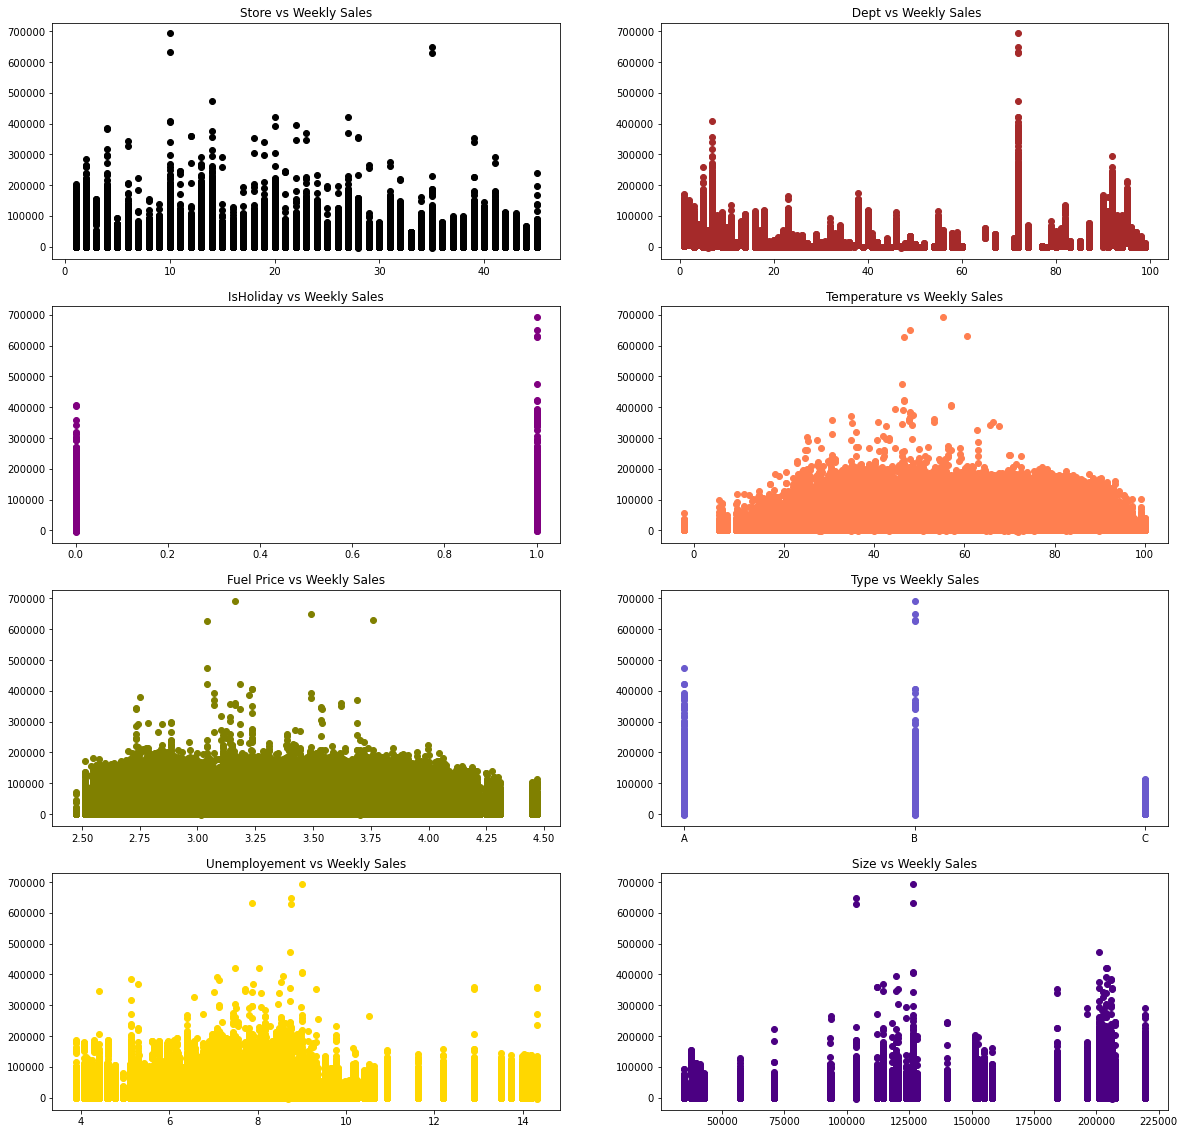

In [38]:
fig = plt.figure(figsize=(20,20))

ax1=plt.subplot(4, 2, 1)
plt.scatter(train['Store'], train['Weekly_Sales'],color='black')

ax2=plt.subplot(4, 2, 2)
plt.scatter(train['Dept'],train['Weekly_Sales'],color='brown')

ax3=plt.subplot(4, 2, 3)
plt.scatter(train['IsHoliday'],train['Weekly_Sales'],color='purple')

ax4=plt.subplot(4, 2, 4)
plt.scatter(train['Temperature'], train['Weekly_Sales'],color='coral')


ax5=plt.subplot(4,2,5)
plt.scatter(train['Fuel_Price'], train['Weekly_Sales'],color='olive')

ax6=plt.subplot(4,2,6)
plt.scatter(train['Type'], train['Weekly_Sales'],color='slateblue')


ax7=plt.subplot(4,2,7)
plt.scatter(train['Unemployment'], train['Weekly_Sales'],color='gold')

ax8=plt.subplot(4,2,8)
plt.scatter(train['Size'], train['Weekly_Sales'],color='indigo')

ax1.title.set_text('Store vs Weekly Sales')
ax2.title.set_text(' Dept vs Weekly Sales')
ax3.title.set_text('IsHoliday vs Weekly Sales')
ax4.title.set_text('Temperature vs Weekly Sales')
ax5.title.set_text('Fuel Price vs Weekly Sales')
ax6.title.set_text('Type vs Weekly Sales')
ax7.title.set_text('Unemployement vs Weekly Sales')
ax8.title.set_text('Size vs Weekly Sales')


plt.show()

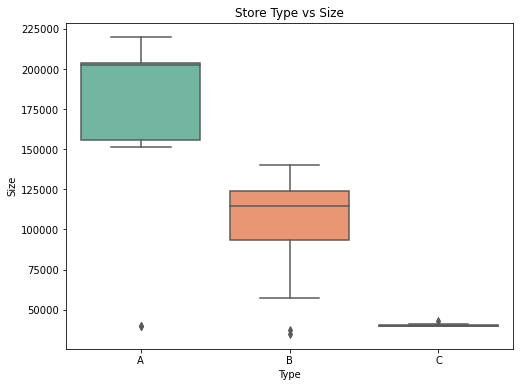

In [39]:
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type,palette='Set2')
ax.title.set_text("Store Type vs Size")

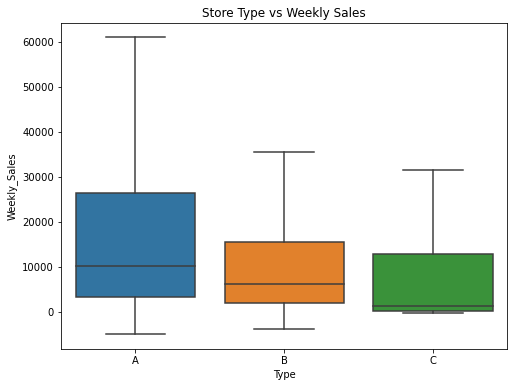

In [40]:
store_sale = pd.concat([train['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)
ax.title.set_text("Store Type vs Weekly Sales")

[]

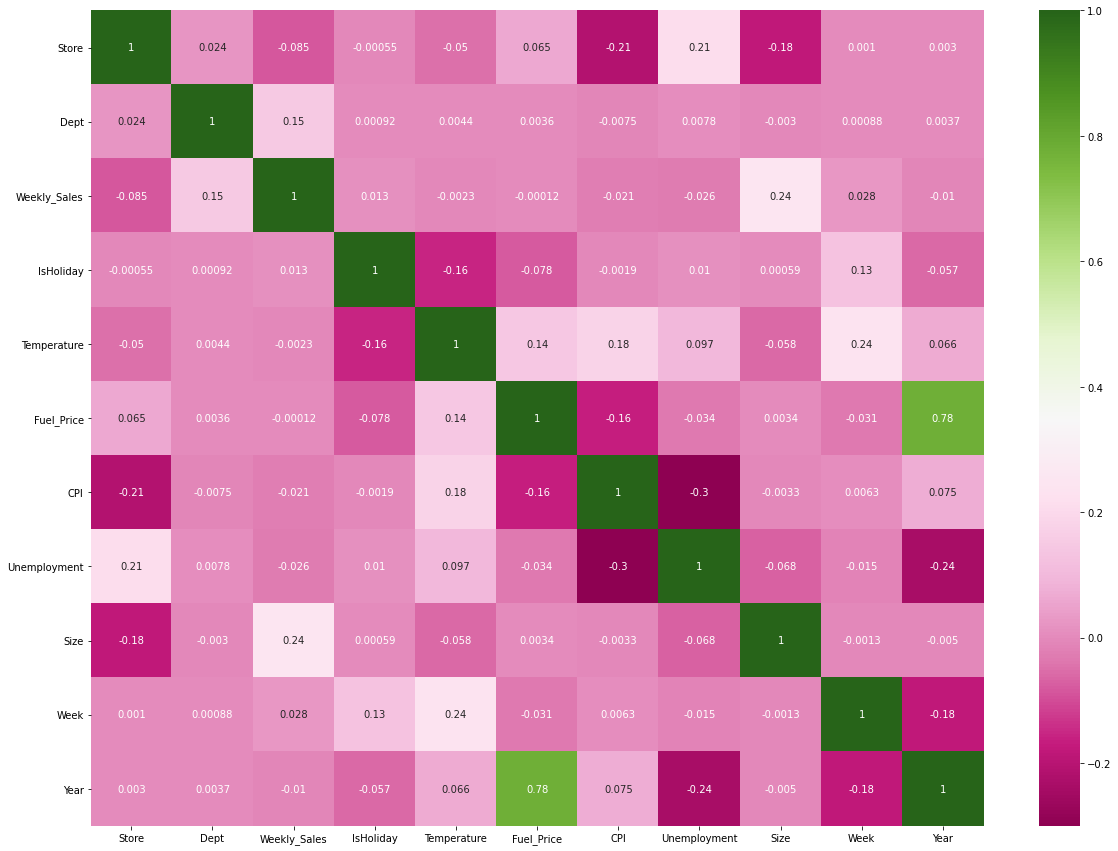

In [41]:
corr = train.corr()
plt.figure(figsize=(20, 15))                                   # plotting correlation among all the features
sns.heatmap(corr, annot=True,cmap="PiYG")
plt.plot()

In [42]:
X = train[['Store', 'Dept', 'IsHoliday','Size','Week','Year']]              #building train test set
y = train['Weekly_Sales']

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)     #train test split

#### Machine Learining Models

In [44]:
rf = RandomForestRegressor();                   #Random Forest Regressor
rf.fit(xtrain, ytrain);
rf.score(xtest, ytest)

0.9732459933614098

In [45]:
knn = KNeighborsRegressor();
knn.fit(xtrain, ytrain);                      #KNN Regressor
knn.score(xtest, ytest)

0.7287094934850225

In [46]:
dt = DecisionTreeRegressor();                      #Decision Tree Regressor
dt.fit(xtrain, ytrain);
dt.score(xtest, ytest)

0.9523733929381889

In [48]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,44,2012
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573,A,151315,45,2012
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573,A,151315,46,2012
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573,A,151315,47,2012
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573,A,151315,48,2012


In [71]:
prediction = dt.predict(test[['Store', 'Dept', 'IsHoliday','Size','Week','Year']])               #model prediction
prediction

array([35991.04, 18689.54, 19050.66, ...,   695.21,   845.3 ,   657.63])

In [72]:
df2=pd.read_csv("Sample Data.csv")                 #importing sample dataset

In [73]:
df2.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [74]:
df2.Weekly_Sales=prediction

In [75]:
df2.head()                       #Predicted Weekly Sales

,Id,Weekly_Sales
0,1_1_2012-11-02,35991.04
1,1_1_2012-11-09,18689.54
2,1_1_2012-11-16,19050.66
3,1_1_2012-11-23,20911.25
4,1_1_2012-11-30,25293.49


#### Saving the model  using pickle

In [65]:
import pickle

In [66]:
filename='final_model.pkl'                                                 #saving the model to the disk

In [67]:
pickle.dump(dt,open(filename,'wb'))

In [68]:
loaded_model=pickle.load(open(filename,'rb'))                              #loading the model from disk

In [69]:
final= loaded_model.score(xtest,ytest)

In [70]:
print(final)

0.9523733929381889
